In [4]:
%pip install pandas
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Jupyter Notebook 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern style for the plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['font.size'] = 12


# Car Data Analysis & Modeling

In this notebook, we will:

1. Load and explore car data.
2. Visualize relationships between RPM, Boost Pressure, and Throttle Position.
3. Compute basic statistics and anomalies.
4. Build and evaluate linear regression models.
5. Extend the model to include multiple features.
6. Experiment with a classification model (Random Forest) to detect "over-boost" situations.

Let’s get started!


In [6]:
# Load the data
data = pd.read_csv('car_data.csv')

# Display the first few rows
print("Dataset Preview:")
display(data.head())


Dataset Preview:


,rpm,boost_psi,throttle_position,afr
0,1000,5,10,14.5
1,2000,7,20,14.7
2,3000,10,50,14.9
3,4000,12,70,15.0
4,5000,15,80,14.8


In [7]:
# Display summary statistics
print("Summary Statistics:")
display(data.describe())

# Calculate average boost pressure
average_boost = data['boost_psi'].mean()
print(f"\nAverage Boost Pressure: {average_boost:.2f} PSI")

# Find anomalies where AFR > 15
anomalies = data[data['afr'] > 15]
print("\nAnomalies (AFR > 15):")
display(anomalies)


Summary Statistics:


,rpm,boost_psi,throttle_position,afr
count,5.00000,5.000000,5.000000,5.000000
mean,3000.00000,9.800000,46.000000,14.780000
std,1581.13883,3.962323,30.495901,0.192354
min,1000.00000,5.000000,10.000000,14.500000
25%,2000.00000,7.000000,20.000000,14.700000
50%,3000.00000,10.000000,50.000000,14.800000
75%,4000.00000,12.000000,70.000000,14.900000
max,5000.00000,15.000000,80.000000,15.000000



Average Boost Pressure: 9.80 PSI

Anomalies (AFR > 15):


,rpm,boost_psi,throttle_position,afr


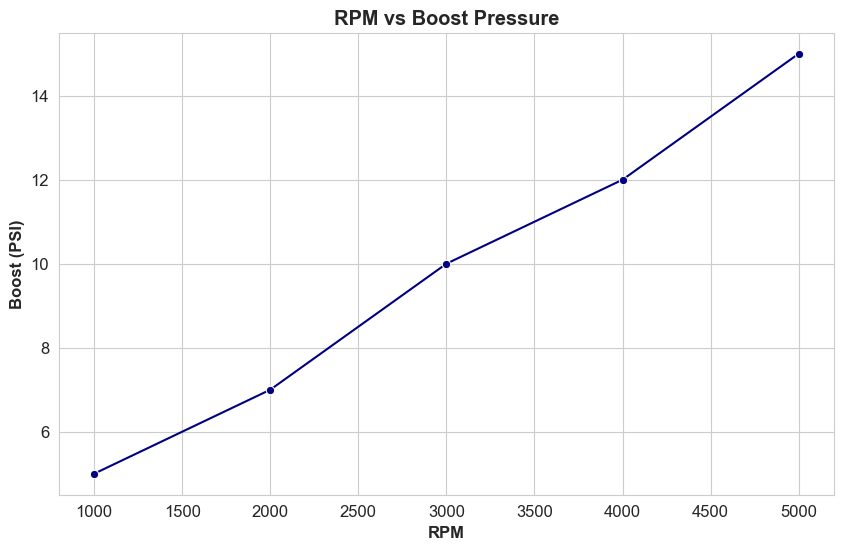

In [8]:
# line plot with markers
plt.figure()
sns.lineplot(x='rpm', y='boost_psi', data=data, marker='o', color='navy')
plt.title('RPM vs Boost Pressure')
plt.xlabel('RPM')
plt.ylabel('Boost (PSI)')
plt.show()


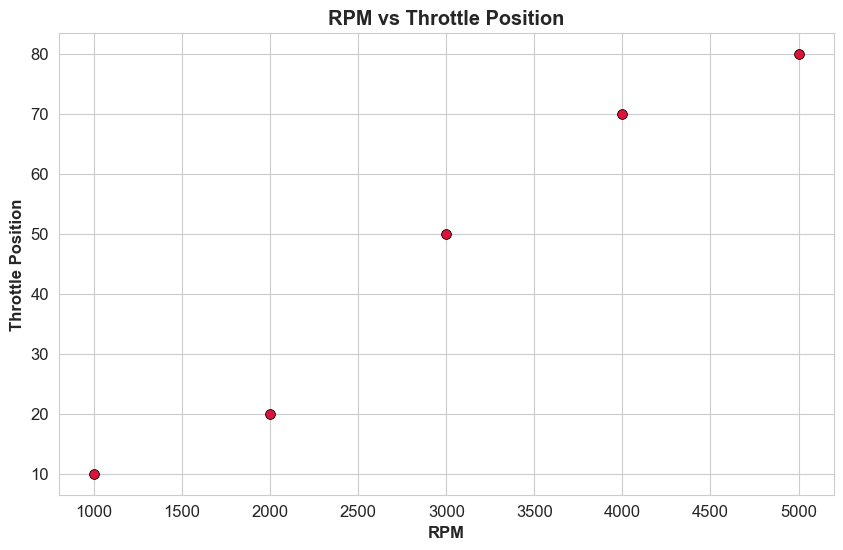

In [9]:
# Scatter plot with a nicer palette
plt.figure()
sns.scatterplot(x='rpm', y='throttle_position', data=data, color='crimson', s=50, edgecolor='black')
plt.title('RPM vs Throttle Position')
plt.xlabel('RPM')
plt.ylabel('Throttle Position')
plt.show()


In [10]:
# Save the dataset with a new derived column
data['boost_to_rpm_ratio'] = data['boost_psi'] / data['rpm']
data.to_csv('processed_car_data.csv', index=False)
print("Processed data saved to 'processed_car_data.csv'.")


Processed data saved to 'processed_car_data.csv'.


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Prepare data
X = data[['rpm']]  # Feature: RPM
y = data['boost_psi']  # Target: Boost Pressure

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Evaluation (Single Feature):")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")

# Display predictions vs actual
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(predictions.head())


Model Evaluation (Single Feature):
R² Score: nan
Mean Squared Error: 0.18


c:\Users\affan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


,Actual,Predicted
1,7,7.428571


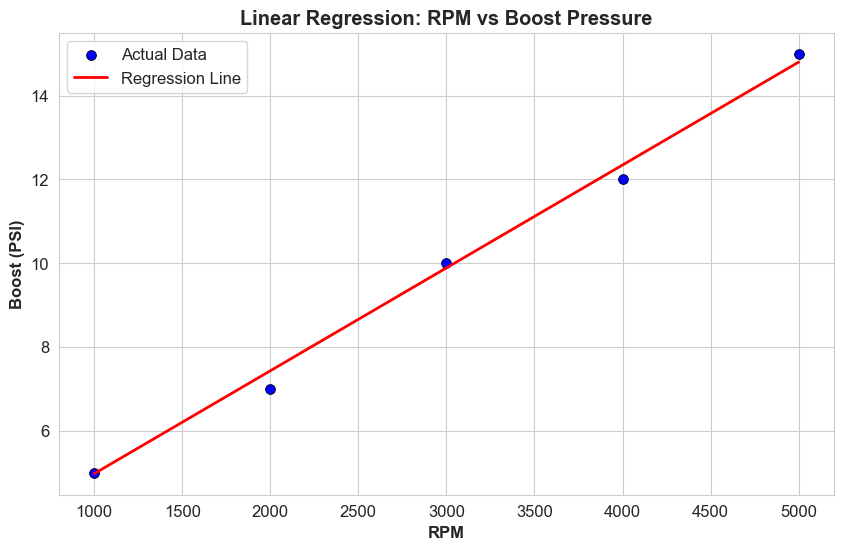

In [13]:
plt.figure()
sns.scatterplot(
    x='rpm', 
    y='boost_psi', 
    data=data, 
    color='blue', 
    s=50, 
    edgecolor='black', 
    label='Actual Data'
)

# Use X['rpm'] and model.predict(X) directly as arrays
sns.lineplot(
    x=X['rpm'], 
    y=model.predict(X), 
    color='red', 
    linewidth=2, 
    label='Regression Line'
)

plt.title('Linear Regression: RPM vs Boost Pressure')
plt.xlabel('RPM')
plt.ylabel('Boost (PSI)')
plt.legend()
plt.show()


In [14]:
# Prepare data with two features
X = data[['rpm', 'throttle_position']]
y = data['boost_psi']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the enhanced model
print("Enhanced Model Evaluation (RPM & Throttle):")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")

predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
display(predictions.head())


Enhanced Model Evaluation (RPM & Throttle):
R² Score: nan
Mean Squared Error: 0.86


c:\Users\affan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


,Actual,Predicted
1,7,7.928571


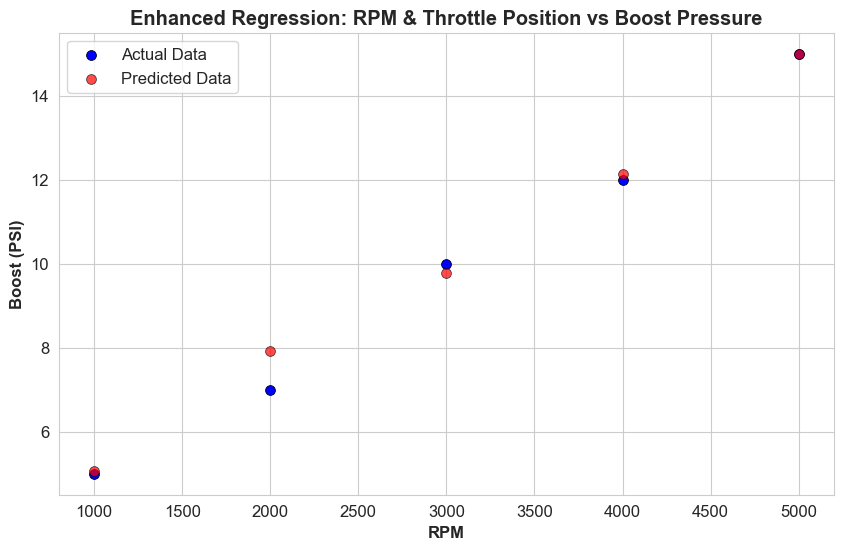

In [16]:
plt.figure()
sns.scatterplot(
    x='rpm', 
    y='boost_psi', 
    data=data, 
    color='blue', 
    s=50, 
    edgecolor='black', 
    label='Actual Data'
)

# For the predicted data, provide arrays directly without passing as a string:
sns.scatterplot(
    x=X['rpm'], 
    y=model.predict(X), 
    color='red', 
    s=50, 
    edgecolor='black', 
    label='Predicted Data', 
    alpha=0.7
)

plt.title('Enhanced Regression: RPM & Throttle Position vs Boost Pressure')
plt.xlabel('RPM')
plt.ylabel('Boost (PSI)')
plt.legend()
plt.show()


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Add a binary target: Over-Boost (1 if boost_psi > 12, else 0)
data['over_boost'] = (data['boost_psi'] > 12).astype(int)

# Features for classification
X_class = data[['rpm', 'throttle_position']]
y_class = data['over_boost']

# Split the data for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_class, y_train_class)

# Classification predictions
y_pred_class = classifier.predict(X_test_class)

# Evaluation
print("Classification Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test_class, y_pred_class):.2f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_class))

print("\nClassification Report:")
print(classification_report(y_test_class, y_pred_class))


Classification Model Evaluation:
Accuracy: 1.00

Confusion Matrix:
[[1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



c:\Users\affan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


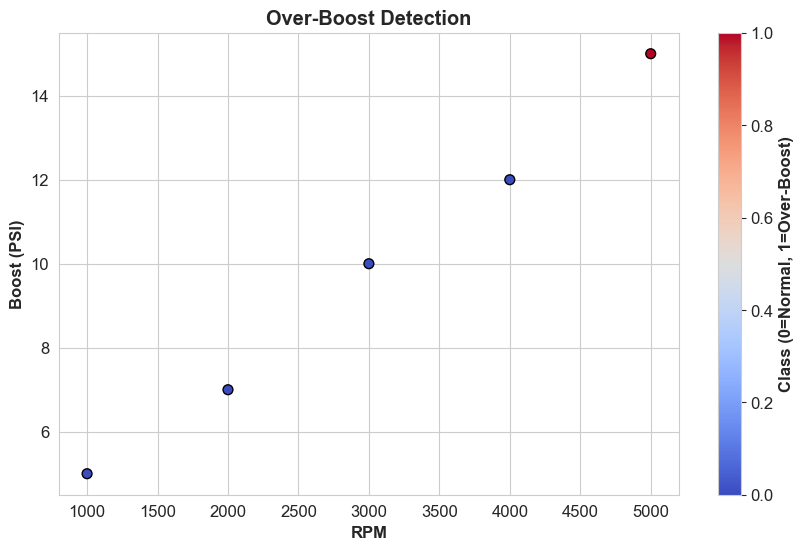

In [18]:
# Add predictions to the dataset for visualization
data['predicted_class'] = classifier.predict(X_class)

plt.figure()
scatter = plt.scatter(data['rpm'], data['boost_psi'], c=data['predicted_class'], 
                      cmap='coolwarm', s=50, edgecolor='black')
plt.colorbar(scatter, label='Class (0=Normal, 1=Over-Boost)')
plt.title('Over-Boost Detection')
plt.xlabel('RPM')
plt.ylabel('Boost (PSI)')
plt.show()


## Conclusion

- We explored a dataset containing RPM, Boost Pressure, AFR, and Throttle Position.
- Basic visualizations and summary statistics provided insights into the data.
- A linear regression model (using RPM) and an enhanced model (using RPM and Throttle Position) were built and evaluated.
- A classification model (Random Forest) was introduced to detect "over-boost" scenarios.

This notebook serves as a starting point for further analysis and modeling. Additional feature engineering, hyperparameter tuning, or advanced models may further improve performance.
